In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-1-961007839>:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("label", group_keys=False).apply(lambda x: x.sample(min(len(x), 20000), random_state=6781))


                        duration  src_bytes  dst_bytes  missed_bytes  \
duration                1.000000   0.009534   0.007430      0.002411   
src_bytes               0.009534   1.000000   0.940137      0.152815   
dst_bytes               0.007430   0.940137   1.000000      0.159067   
missed_bytes            0.002411   0.152815   0.159067      1.000000   
src_pkts                0.133150  -0.000481   0.011291      0.074747   
src_ip_bytes            0.120855   0.001079   0.003595      0.021783   
dst_pkts                0.205056   0.014636   0.000704      0.003498   
dst_ip_bytes            0.217247   0.010368   0.012221      0.062752   
http_response_body_len  0.000749  -0.000178   0.016593      0.099361   

                        src_pkts  src_ip_bytes  dst_pkts  dst_ip_bytes  \
duration                0.133150      0.120855  0.205056      0.217247   
src_bytes              -0.000481      0.001079  0.014636      0.010368   
dst_bytes               0.011291      0.003595  0.000704 

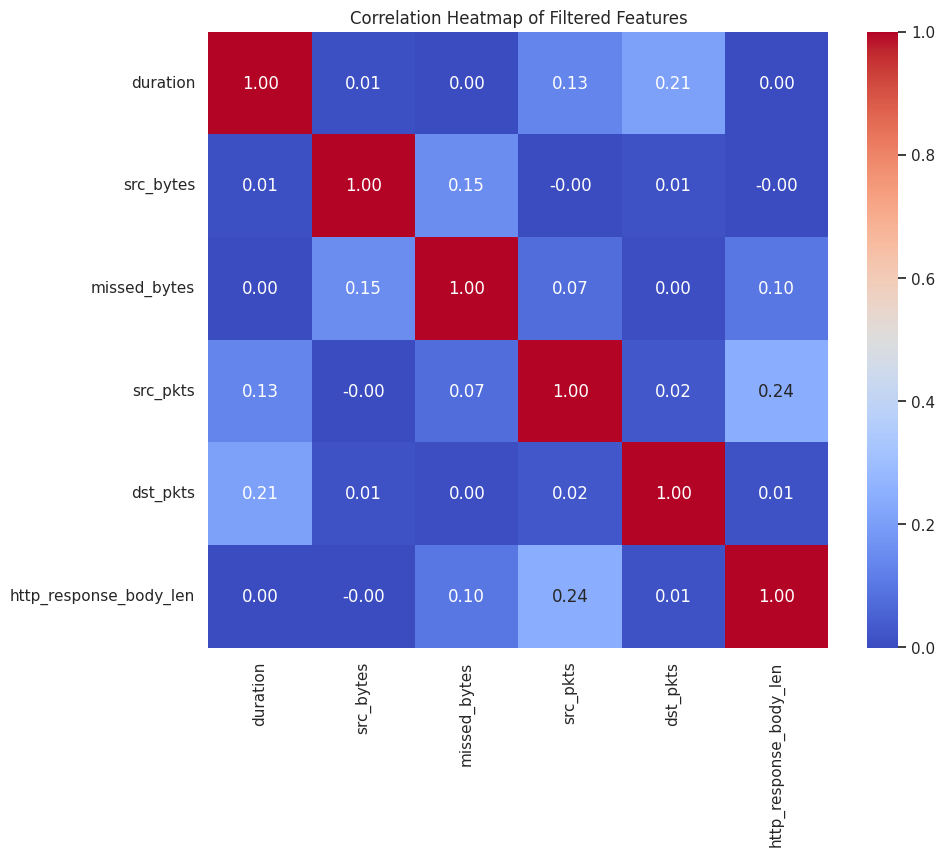

=== Original Data ===
<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 84033 to 40036
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   src_ip                  40000 non-null  object 
 1   src_port                40000 non-null  int64  
 2   dst_ip                  40000 non-null  object 
 3   dst_port                40000 non-null  int64  
 4   proto                   40000 non-null  object 
 5   service                 40000 non-null  object 
 6   duration                40000 non-null  float64
 7   src_bytes               40000 non-null  int64  
 8   dst_bytes               40000 non-null  int64  
 9   conn_state              40000 non-null  object 
 10  missed_bytes            40000 non-null  int64  
 11  src_pkts                40000 non-null  int64  
 12  src_ip_bytes            40000 non-null  int64  
 13  dst_pkts                40000 non-null  int64  
 14  dst_ip_bytes     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFdr
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import random

# Read network data
random.seed(6781)
np.random.seed(6781)

# Load dataset
data = pd.read_csv("train_test_network.csv")

# Sample 20,000 records from each class
data = data.groupby("label", group_keys=False).apply(lambda x: x.sample(min(len(x), 20000), random_state=6781))

# Split data for processing
no_attributes = data.shape[1] - 2
dt = data.iloc[:, 0:no_attributes]   # data without classes
orignal_dt = data.iloc[:, 0:data.shape[1]-1]  # without timestamp and attack categories

# Data conversion to numeric values
cols = ['duration', 'src_bytes', 'dst_bytes', 'missed_bytes', 'src_pkts',
        'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'http_response_body_len']

out = dt[cols].copy()

# Data normalization
scaler = MinMaxScaler()
dt_n = pd.DataFrame(scaler.fit_transform(out), columns=out.columns)

all_dt = pd.concat([dt_n, data.iloc[:, -1].reset_index(drop=True)], axis=1)
all_dt.columns = list(dt_n.columns) + ["label"]

# Correlation analysis and Feature Selection
correlationMatrix = dt_n.corr().fillna(0)

# Print correlation matrix
print(correlationMatrix)

# Identify highly correlated features
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))
highlyCorrelated = [column for column in upper.columns if any(upper[column].abs() > 0.5)]
print("Highly Correlated Attributes (cutoff=0.5):", highlyCorrelated)

# Filter less correlated features
dt_corr = dt_n.drop(columns=highlyCorrelated)
dt_corr_m = dt_corr.corr()

# Plot correlation heatmap
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(dt_corr_m, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Filtered Features")
plt.show()

# Final dataset for classification
data_corr = pd.concat([dt_corr, data.iloc[:, -1].reset_index(drop=True)], axis=1)
data_corr.columns = list(dt_corr.columns) + ["label"]

# Machine Learning for Classification
# Split 70% training, 30% testing
filtered_train, filtered_test, orignal_train, orignal_test = train_test_split(
    data_corr, orignal_dt, test_size=0.3, random_state=3033, stratify=data_corr['label']
)

# Statistics and Data Overview
print("=== Original Data ===")
print(data.info())
print(data.describe(include='all'))

print("=== Filtered Train Summary ===")
print(filtered_train.describe())

print("=== Filtered Test Summary ===")
print(filtered_test.describe())

print("=== Original Train Summary ===")
print(orignal_train.describe())

print("=== Original Test Summary ===")
print(orignal_test.describe())


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.3 MB/s eta 0:00:00


In [ ]:
# Install h2o
# !pip install h2o
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2ONaiveBayesEstimator, H2ODeepLearningEstimator, H2OXGBoostEstimator
from h2o.frame import H2OFrame

# Start H2O
h2o.init(ip="localhost", port=54321)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,44 mins 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.140 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import pandas as pd

# Assume 'orignal_train' and 'orignal_test' already exist (loaded via pandas as per earlier code)

selected_columns = [
    'duration',
    'src_bytes',
    'dst_bytes',
    'missed_bytes',
    'src_pkts',
    'src_ip_bytes',
    'dst_pkts',
    'dst_ip_bytes',
    'http_response_body_len',
    'label'
]

# Select only the required features + label
training = orignal_train[selected_columns].copy()
testing = orignal_test[selected_columns].copy()

# Convert to H2OFrame
train_hex = h2o.H2OFrame(training)
test_hex = h2o.H2OFrame(testing)

# Column index of label
label_no = train_hex.ncols - 1
no_features = train_hex.ncols - 1

# Convert label to factor (i.e., categorical)
train_hex[label_no] = train_hex[label_no].asfactor()
test_hex[label_no] = test_hex[label_no].asfactor()

features = train_hex.col_names[:-1]
target = train_hex.col_names[-1]


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.03712252020292253
RMSE: 0.1926720535078259
LogLoss: 0.14963985348084682
Mean Per-Class Error: 0.0285
AUC: 0.9921651944444444
AUCPR: 0.9915344288812721
Gini: 0.9843303888888888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5032996943055553
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5805  195   0.0325   (195.0/6000.0)
1      147   5853  0.0245   (147.0/6000.0)
Total  5952  6048  0.0285   (342.0/12000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.5033       0.971614  213
max f2                       0.5033       0.973942  213
max f0point5                 0.588124     0.974305  196
max accuracy                 0.5033    

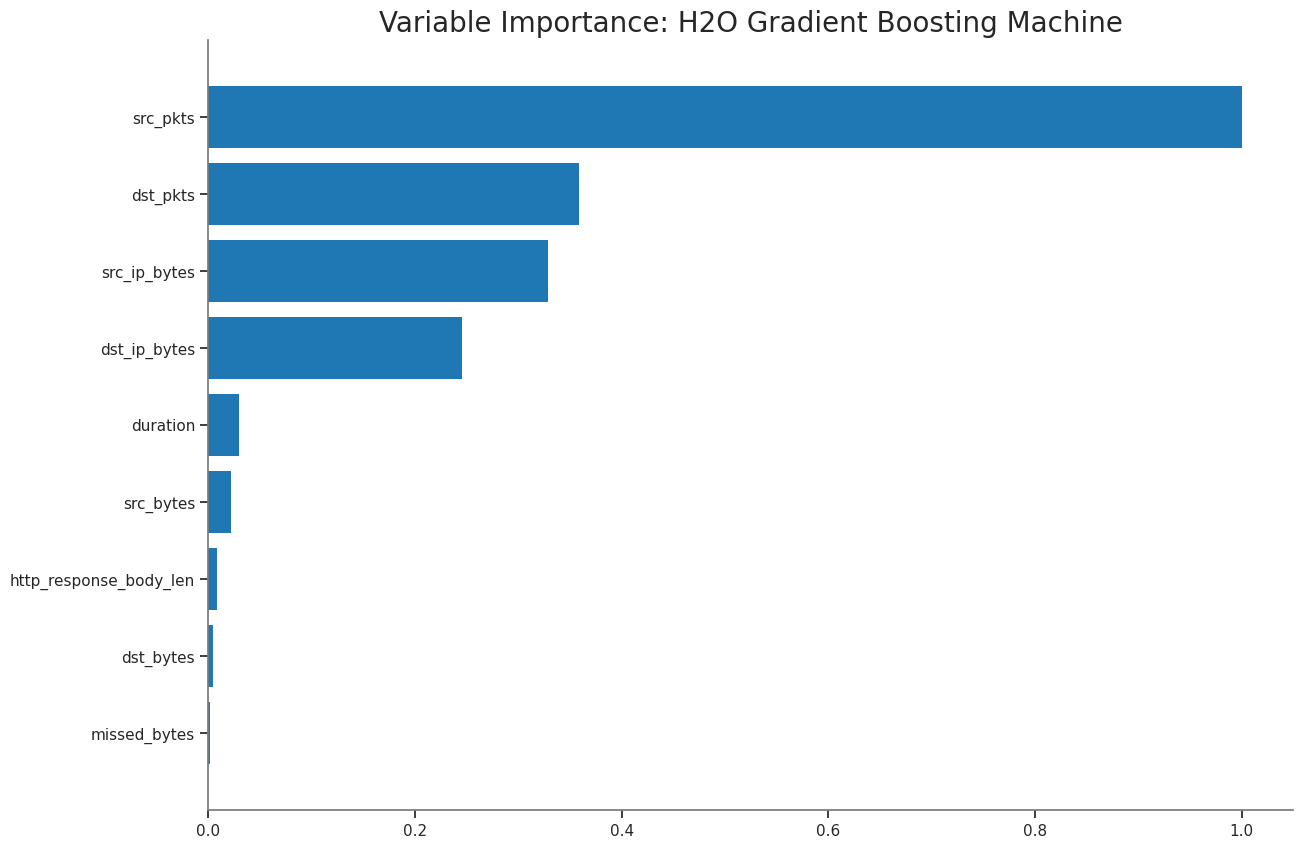

<Figure size 640x480 with 0 Axes>

In [ ]:
#model_gbm = H2OGradientBoostingEstimator(
    #ntrees=15,
    #max_depth=5,
    #min_rows=2,
    #learn_rate=0.01,
    #distribution="multinomial",
    #nfolds=10,
    #model_id="network_data_gbm_model"
#)

#model_gbm.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)
from h2o.estimators import H2OGradientBoostingEstimator

model_gbm = H2OGradientBoostingEstimator(
    ntrees=100,
    max_depth=5,
    learn_rate=0.05,
    nfolds=10,
    keep_cross_validation_predictions=True,
    model_id="network_data_gbm_model"
)

model_gbm.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_gbm = model_gbm.model_performance(test_data=test_hex)
print(perf_gbm)

print("AUC:", perf_gbm.auc())
print("F1 Score:", perf_gbm.F1())
print("Gini Coeff:", model_gbm.giniCoef(train=True, valid=True, xval=False))
print("Accuracy:", perf_gbm.accuracy())

model_gbm.varimp_plot()


In [ ]:
model_nb = H2ONaiveBayesEstimator(
    laplace=3,
    nfolds=10,
    model_id="network_data_nb_model"
)


model_nb.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_nb = model_nb.model_performance(test_data=test_hex)
print("AUC:", perf_nb.auc())
print("Accuracy:", perf_nb.accuracy())
print("Train/Valid AUC:", model_nb.auc(train=True, valid=True, xval=False))


naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
AUC: 0.3692608333333333
Accuracy: [[0.9912813801503271, 0.523]]
Train/Valid AUC: {'train': 0.36449284693877554, 'valid': 0.3692608333333333}


In [ ]:
from h2o.estimators import H2OXGBoostEstimator

# Step 1: Improved XGBoost model with regularization and deeper tree exploration
model_xgb = H2OXGBoostEstimator(
    ntrees=200,                  # more trees for better learning
    learn_rate=0.05,             # slower learning for stability
    max_depth=8,                 # deeper trees for better feature interaction
    min_rows=10,                 # reduce overfitting
    sample_rate=0.8,             # row sampling for regularization
    col_sample_rate=0.8,         # column sampling
    score_tree_interval=10,      # monitor scoring every 10 trees
    stopping_rounds=5,           # early stopping
    stopping_metric="AUC",
    stopping_tolerance=0.001,
    nfolds=10,                   # more robust CV
    keep_cross_validation_predictions=True,  # for ensemble if needed
    seed=42,
    model_id="xgb_improved"
)

# Step 2: Train the model
model_xgb.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

# Step 3: Evaluate performance
perf_xgb = model_xgb.model_performance(test_data=test_hex)

print("\n🔍 Improved XGBoost Evaluation:")
print(f"AUC: {perf_xgb.auc():.4f}")
print(f"Accuracy: {perf_xgb.accuracy()[0][1]:.4f}")
print("Train/Valid AUC:", model_xgb.auc(train=True, valid=True, xval=False))



xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%

🔍 Improved XGBoost Evaluation:
AUC: 0.9987
Accuracy: 0.9856
Train/Valid AUC: {'train': 0.998882431122449, 'valid': 0.9986788611111111}


In [ ]:
#model_rf = H2ORandomForestEstimator(
 #   ntrees=150,
  #  stopping_rounds=2,
   # seed=10000,
    #nfolds=10,
    #model_id="network_data_RF_model"
#)

#model_rf.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)
from h2o.estimators import H2ORandomForestEstimator

model_rf = H2ORandomForestEstimator(
    ntrees=150,
    nfolds=10,
    keep_cross_validation_predictions=True,
    model_id="network_data_RF_model"
)
model_rf.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_rf = model_rf.model_performance(test_data=test_hex)
print("AUC:", perf_rf.auc())
print("Accuracy:", perf_rf.accuracy())
print("Train/Valid AUC:", model_rf.auc(train=True, valid=True, xval=False))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
AUC: 0.998904125
Accuracy: [[0.5162347704172134, 0.99125]]
Train/Valid AUC: {'train': 0.9985045714285714, 'valid': 0.998904125}


In [ ]:
#model_dl = H2ODeepLearningEstimator(
 #   hidden=[20, 20, 15],
  #  epochs=100,
   # nfolds=10,
   # model_id="network_data_dl_model"
#)

#model_dl.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model_dl = H2ODeepLearningEstimator(
    hidden=[128, 256, 128],
    activation="RectifierWithDropout",
    input_dropout_ratio=0.1,
    hidden_dropout_ratios=[0.3, 0.3, 0.3],
    epochs=300,
    balance_classes=True,
    l1=1e-5,
    l2=1e-5,
    stopping_metric="AUC",
    stopping_rounds=5,
    nfolds=10,
    keep_cross_validation_predictions=True,
    model_id="deep_learning_advanced"
)

model_dl.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_dl = model_dl.model_performance(test_data=test_hex)
print("AUC:", perf_dl.auc())
print("Accuracy:", perf_dl.accuracy())
print("Train/Valid AUC:", model_dl.auc(train=True, valid=True, xval=False))



deeplearning Model Build progress: |██ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9ed2913718165271783e7432b5ca4924> was cancelled by the user.

In [ ]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

model_dl = H2ODeepLearningEstimator(
    hidden=[128, 256, 128],
    activation="RectifierWithDropout",
    input_dropout_ratio=0.1,
    hidden_dropout_ratios=[0.3, 0.3, 0.3],
    epochs=300,
    balance_classes=True,
    l1=1e-5,
    l2=1e-5,
    stopping_metric="AUC",
    stopping_rounds=5,
    nfolds=10,
    model_id="deep_learning_advanced"
)
model_dl.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_dl = model_dl.model_performance(test_data=test_hex)
print("AUC:", perf_dl.auc())
print("Accuracy:", perf_dl.accuracy())
print("Train/Valid AUC:", model_dl.auc(train=True, valid=True, xval=False))


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
AUC: 0.5977080277777778
Accuracy: [[0.3873598109315059, 0.5955]]
Train/Valid AUC: {'train': 0.6000818277043877, 'valid': 0.5977080277777778}


In [ ]:
from h2o.estimators import H2OXGBoostEstimator

model_xgb = H2OXGBoostEstimator(
    ntrees=100,
    max_depth=6,
    learn_rate=0.1,
    col_sample_rate=0.8,
    sample_rate=0.8,
    nfolds=10,
    seed=42,
    model_id="xgb_advanced"
)
model_xgb.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_xgb = model_xgb.model_performance(test_data=test_hex)
print("AUC:", perf_xgb.auc())
print("Accuracy:", perf_xgb.accuracy())
print("Train/Valid AUC:", model_xgb.auc(train=True, valid=True, xval=False))


xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
AUC: 0.9991118750000001
Accuracy: [[0.48877906799316406, 0.98825]]
Train/Valid AUC: {'train': 0.9994911632653062, 'valid': 0.9991118750000001}


In [ ]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

ensemble = H2OStackedEnsembleEstimator(
    base_models=[
        "network_data_RF_model",
        "network_data_gbm_model",
        "deep_learning_advanced",
        "xgb_advanced"
    ],
    model_id="stacked_ensemble_advanced"
)
ensemble.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_ensemble = ensemble.model_performance(test_data=test_hex)
print("AUC:", perf_ensemble.auc())
print("Accuracy:", perf_ensemble.accuracy())
print("Train/Valid AUC:", ensemble.auc(train=True, valid=True, xval=False))


stackedensemble Model Build progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_99ca310d62bc7890354cad583294c39 failed with an exception: water.exceptions.H2OIllegalArgumentException: Base model does not keep cross-validation predictions: 10
stacktrace: 
water.exceptions.H2OIllegalArgumentException: Base model does not keep cross-validation predictions: 10
	at hex.ensemble.StackedEnsemble.checkAndInheritModelProperties(StackedEnsemble.java:495)
	at hex.ensemble.StackedEnsemble$StackedEnsembleDriver.computeImpl(StackedEnsemble.java:767)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(
    max_models=20,
    seed=1,
    sort_metric="AUC",
    balance_classes=True,
    nfolds=10
)
automl.train(x=features, y=target, training_frame=train_hex)

# Best model from AutoML leaderboard
model_best = automl.leader
perf_best = model_best.model_performance(test_data=test_hex)

print("Best AutoML Model AUC:", perf_best.auc())
print("Accuracy:", perf_best.accuracy())
print("Train/Valid AUC:", model_best.auc(train=True, valid=True, xval=False))

# Optional: Print leaderboard
print("\nAutoML Leaderboard:")
print(automl.leaderboard.head())


AutoML progress: |██ (cancelled)

09:47:08.368: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 0 seconds, you may want to increase this value before retrying.



H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9d59dc32dc4e4c0323b83da2a15f488e> was cancelled by the user.

In [ ]:
# Convert H2OFrames to pandas
train_df = train_hex.as_data_frame()
test_df = test_hex.as_data_frame()

# Separate features and labels
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

svm = SVC(probability=True, kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Convert H2OFrame to Pandas DataFrames
train_df = train_hex.as_data_frame()
test_df = test_hex.as_data_frame()

# Separate features and labels
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
# Step 5: Predict
y_pred_probs = model_lstm.predict(X_test_lstm).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 6: Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)
f1 = f1_score(y_test, y_pred)

# Step 7: Print results
print("✅ LSTM Model Evaluation:")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` objec

Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9138 - loss: 0.4067 - val_AUC: 0.9649 - val_loss: 0.2771
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9664 - loss: 0.2599 - val_AUC: 0.9722 - val_loss: 0.2318
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.9732 - loss: 0.2293 - val_AUC: 0.9750 - val_loss: 0.2244
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.9727 - loss: 0.2203 - val_AUC: 0.9757 - val_loss: 0.2101
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.9745 - loss: 0.2146 - val_AUC: 0.9742 - val_loss: 0.2195
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9735 - loss: 0.2191 - val_AUC: 0.9736 - val_loss: 0.2168
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9736 - loss: 0.2197 - val_AUC: 0.9784 - val_loss: 0.2079
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9766 - loss: 0.2083 - val_AUC: 0.9795 - val_loss: 0.1752
Epoch 9/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AU

In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import h2o
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Step 1: Convert H2O training and test sets to Pandas
train_df = train_hex.as_data_frame()
test_df = test_hex.as_data_frame()

# Step 2: Separate features and target
X_train = train_df[features]
y_train = train_df[target].astype(int)

X_test = test_df[features]
y_test = test_df[target].astype(int)

# Step 3: Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 128, 64), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)[:, 1]

# Step 5: Print evaluation metrics
print("\n🔍 MLP Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"



🔍 MLP Classifier Evaluation:
Accuracy: 0.5756
AUC: 0.5672
F1 Score: 0.5269

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62      6000
           1       0.60      0.47      0.53      6000

    accuracy                           0.58     12000
   macro avg       0.58      0.58      0.57     12000
weighted avg       0.58      0.58      0.57     12000



In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import h2o
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Step 1: Convert H2O training and test sets to Pandas
train_df = train_hex.as_data_frame()
test_df = test_hex.as_data_frame()

# Step 2: Extract features and labels
X_train = train_df[features]
y_train = train_df[target].astype(int)

X_test = test_df[features]
y_test = test_df[target].astype(int)

# Step 3: Train the SVM classifier (with probability enabled for AUC)
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm.fit(X_train, y_train)

# Step 4: Predict
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

# Step 5: Evaluation
print("\n🔍 SVM Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"



🔍 SVM Classifier Evaluation:
Accuracy: 0.5001
AUC: 0.5000
F1 Score: 0.0003

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6000
           1       1.00      0.00      0.00      6000

    accuracy                           0.50     12000
   macro avg       0.75      0.50      0.33     12000
weighted avg       0.75      0.50      0.33     12000



In [ ]:
# Step 1: Provide a new input row
import pandas as pd

new_input_data = pd.DataFrame([{
    'duration': 0.000549,
    'src_bytes': 0,
    'dst_bytes': 298,
    'missed_bytes': 0,
    'src_pkts': 0,
    'src_ip_bytes': 0,
    'dst_pkts': 2,
    'dst_ip_bytes': 354,
    'http_response_body_len': 0
}])

# Step 2: Convert to H2O Frame
import h2o
from h2o.frame import H2OFrame
h2o_input = h2o.H2OFrame(new_input_data)

# Step 3: Use your trained model to predict (e.g., GBM, RF, NB, DL)
# You can replace model_gbm with any other: model_dl, model_rf, model_nb
prediction = model_xgb.predict(h2o_input)

# Step 4: Show the result
print(" Prediction Result (0 = Normal, 1 = Attack):")
print(prediction)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
 Prediction Result (0 = Normal, 1 = Attack):
  predict        p0          p1
        0  0.998822  0.00117801
[1 row x 3 columns]



In [ ]:
import pandas as pd
import h2o
from h2o.frame import H2OFrame

# Step 1: Load the full dataset
df = pd.read_csv("train_test_network.csv")

# Step 2: Randomly sample 10 rows
sample_df = df.sample(n=100)

# Step 3: Extract feature columns
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'missed_bytes',
    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
    'http_response_body_len'
]

input_features = sample_df[selected_columns].copy()

# Step 4: Convert to H2OFrame
h2o.init(ip="localhost", port=54321)
h2o_input = H2OFrame(input_features)

# Step 5: Predict using the model
predictions = model_xgb.predict(h2o_input)
predictions_df = predictions.as_data_frame()

# Step 6: Merge prediction with original rows and actual label/type
results = sample_df[['label']].reset_index(drop=True)
if 'category' in sample_df.columns:
    results['attack_type'] = sample_df['category'].reset_index(drop=True)
elif 'attack_type' in sample_df.columns:
    results['attack_type'] = sample_df['attack_type'].reset_index(drop=True)
else:
    results['attack_type'] = "N/A"

results['predicted'] = predictions_df['predict']
results['confidence_attack'] = predictions_df['p1']
results['confidence_normal'] = predictions_df['p0']

# Step 7: Display
print("\n Prediction Results (0 = Normal, 1 = Attack):")
print(results)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,53 mins 36 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.124 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%

 Prediction Results (0 = Normal, 1 = Attack):
    label attack_type  predicted  confidence_attack  confidence_normal
0       1         N/A          1           0.994820           0.005180
1       1         N/A          1           0.994820           0.005180
2       1         N/A          1           0.961771           0.038229
3       1         N/A          1           0.999376           0.000624
4       0         N/A          0           0.001774           0.998226
..    ...         ...        ...                ...                ...
95      1         N/A          1           0.990741           0.009259
96      0         N/A          0           0.000670           0.999330
97      1         N/A          1           0.960424           0.039576
98      1         N/A          1           0.995151  

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
!pip install h2o


In [ ]:
import h2o
from h2o.frame import H2OFrame


In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import h2o
from h2o.frame import H2OFrame
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Initialize H2O
h2o.init(ip="localhost", port=54321)

# Step 2: Load your H2OFrame input (from CSV or earlier code)
df = pd.read_csv("filtered_type_dos_backdoor.csv")

# Step 3: Select model input features
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'missed_bytes',
    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
    'http_response_body_len'
]
input_features = df[selected_columns].copy()

# Step 4: Convert to H2OFrame and then to NumPy for LSTM
h2o_input = H2OFrame(input_features)
input_df = h2o_input.as_data_frame()
X_input = np.expand_dims(input_df.values, axis=1)  # LSTM expects 3D input

# Step 5: (Optional) Define and train LSTM model
# Skip this if your model is already trained and loaded

model_lstm = Sequential([
    LSTM(64, input_shape=(X_input.shape[1], X_input.shape[2])),
    Dense(1, activation='sigmoid')
])

model_xgb.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# If model isn't trained, train it here
# model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Predict
y_pred_probs = model_xgb.predict(X_input).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 7: Attach predictions to original data
df['predicted'] = y_pred
df['confidence_attack'] = y_pred_probs
df['confidence_normal'] = 1 - y_pred_probs

# Step 8: Display results
print("\n🔍 LSTM Predictions on PCAP Features:")
print(df[['duration', 'src_bytes', 'dst_bytes', 'predicted', 'confidence_attack', 'confidence_normal']].head(20))

# Optional: Save to CSV
# df.to_csv("lstm_predictions.csv", index=False)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 51 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.904 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


AttributeError: type object 'ModelBase' has no attribute 'compile'

In [ ]:
# Train RF Model
model_rf = H2ORandomForestEstimator(
    ntrees=150,
    stopping_rounds=2,
    seed=10000,
    nfolds=10,
    model_id="network_data_RF_model"
)
model_rf.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

# Train GBM Model
model_gbm = H2OGradientBoostingEstimator(
    ntrees=15,
    max_depth=5,
    min_rows=2,
    learn_rate=0.01,
    distribution="multinomial",
    nfolds=10,
    model_id="network_data_gbm_model"
)
model_gbm.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

# Train Deep Learning Model
model_dl = H2ODeepLearningEstimator(
    hidden=[20, 20, 15],
    epochs=100,
    nfolds=10,
    model_id="deep_learning_advanced"
)
model_dl.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

# Train XGBoost Model
model_xgb = H2OXGBoostEstimator(
    ntrees=100,
    learn_rate=0.1,
    max_depth=6,
    nfolds=5,
    seed=42,
    model_id="xgb_advanced"
)
model_xgb.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)


drf Model Build progress: |

/usr/local/lib/python3.11/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: xgb_advanced


Model Summary: 
    number_of_trees
--  -----------------
    100

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.007383829040965028
RMSE: 0.08592920947480565
LogLoss: 0.029151186759096635
Mean Per-Class Error: 0.008892857142857143
AUC: 0.9994869974489796
AUCPR: 0.9994654783650931
Gini: 0.9989739948979592

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48779812455177307
       0      1      Error    Rate
-----  -----  -----  -------  ---------------
0      13850  150    0.0107   (150.0/14000.0)
1      99     13901  0.0071   (99.0/14000.0)
Total  13949  14051  0.0089   (249.0/28000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.487798     0.991123  230
max f2                       0.285429     0.993034  263
max f0point5                 0.832294     0.99276   166
max accuracy                 0.532803     0.991107  223
max precision                0.999377     1         0
max recall                   0.0130276    1         361
max specificity              0.999377     1         0
max absolute_mcc             0.487798     0.982221  230
max min_per_class_accuracy   0.613312     0.990071  212
max mean_per_class_accuracy  0.532803     0.991107  223
max tns                      0.999377     14000     0
max fns                      0.999377     12360     0
max fps                      0.000669769  14000     399
max tps                      0.0130276    14000     361
max tnr                      0.999377     1         0
max fnr                      0.999377     0.882857  0
max fpr                      0.000669769  1         399
max tpr                      0.0130276    1         361

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.00 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0580714                   0.999376           2        2                  1                0.999378     1                           0.999378            0.116143        0.116143                   100      100                0.116143
2        0.100107                    0.99926            2        2                  1                0.999264     1                           0.99933             0.0840714       0.200214                   100      100                0.200214
3        0.184429                    0.997936           2        2                  1                0.998286     1                           0.998853            0.168643        0.368857                   100      100                0.368857
4        0.2005                      0.997764           2        2                  1                0.997823     1                           0.99877             0.0321429       0.401                      100      100                0.401
5        0.321107                    0.995151           1.99941  1.99978            0.999704         0.996261     0.999889                    0.997828            0.241143        0.642143                   99.9408  99.9778            0.642071
6        0.401214                    0.989226           1.99554  1.99893            0.997771         0.993075     0.999466                    0.996879            0.159857        0.802                      99.5542  99.8932            0.801571
7        0.500357                    0.613312           1.90418  1.98016            0.952089        

In [ ]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

ensemble = H2OStackedEnsembleEstimator(
    base_models=[
        "network_data_RF_model",
        "network_data_gbm_model",
        "deep_learning_advanced",
        "xgb_advanced"
    ],
    model_id="stacked_ensemble_advanced"
)

ensemble.train(x=features, y=target, training_frame=train_hex, validation_frame=test_hex)

perf_ensemble = ensemble.model_performance(test_data=test_hex)

print("AUC:", perf_ensemble.auc())
print("Accuracy:", perf_ensemble.accuracy())
print("Train/Valid AUC:", ensemble.auc(train=True, valid=True, xval=False))


stackedensemble Model Build progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_85c0d7f62c670765701f26fe00214315 failed with an exception: water.exceptions.H2OIllegalArgumentException: Base model does not keep cross-validation predictions: 10
stacktrace: 
water.exceptions.H2OIllegalArgumentException: Base model does not keep cross-validation predictions: 10
	at hex.ensemble.StackedEnsemble.checkAndInheritModelProperties(StackedEnsemble.java:495)
	at hex.ensemble.StackedEnsemble$StackedEnsembleDriver.computeImpl(StackedEnsemble.java:767)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [ ]:
import pandas as pd
import h2o
from h2o.frame import H2OFrame

# Step 1: Load your extracted PCAP features
df = pd.read_csv("filtered_type_dos_backdoor.csv")

# Step 2: Select only the model-expected columns
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'missed_bytes',
    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
    'http_response_body_len'
]
input_features = df[selected_columns].copy()

# Step 3: Convert to H2O Frame
h2o.init(ip="localhost", port=54321)
h2o_input = H2OFrame(input_features)

# Step 4: Predict using your trained model (e.g., model_rf)
predictions = model_xgb.predict(h2o_input)
predictions_df = predictions.as_data_frame()

# Step 5: Merge predictions with input data
df['predicted'] = predictions_df['predict']
df['confidence_attack'] = predictions_df['p1']
df['confidence_normal'] = predictions_df['p0']

# Step 6: Show results
print("\n Predictions from Real PCAP Data:")
print(df[['duration', 'src_bytes', 'dst_bytes', 'predicted', 'confidence_attack', 'confidence_normal']].head(20))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 58 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.901 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%

 Predictions from Real PCAP Data:
    duration  src_bytes  dst_bytes  predicted  confidence_attack  \
0          0       1530        336          1           0.908187   
1          0        784       8436          1           0.784240   
2          0     758700      30960          1           0.566818   
3          0      19646       1804          1           0.930164   
4          0        460        632          1           0.926891   
5          0        794        336          1           0.914358   
6          0        896       1282          1           0.922782   
7          0       1250      69740          1           0.734673   
8          0        936      53158          1           0.764837   
9          0        838      15816          1           0.781067   
10         0        784    

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Step 0: Imports
import pandas as pd
import numpy as np
import h2o
from h2o.frame import H2OFrame
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Initialize H2O
h2o.init(ip="localhost", port=54321)

# Step 2: Load your normal traffic dataset (already aligned)
df = pd.read_csv("/content/label_0_dos_backdoor_10640.csv")

# Step 3: Select model input features
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'missed_bytes',
    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
    'http_response_body_len'
]
input_features = df[selected_columns].copy()

# Step 4: Convert to H2OFrame and then to NumPy for LSTM input
h2o_input = H2OFrame(input_features)
input_df = h2o_input.as_data_frame()
X_input = np.expand_dims(input_df.values, axis=1)

# Step 5: (Optional) Define and train LSTM model
# Skip training if you've already trained and saved the model

model_lstm = Sequential([
    LSTM(64, input_shape=(X_input.shape[1], X_input.shape[2])),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Optional training block (skip if already trained)
#model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Predict
y_pred_probs = model_lstm.predict(X_input).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

# Step 7: Add predictions to original data
df['predicted'] = y_pred
df['confidence_attack'] = y_pred_probs
df['confidence_normal'] = 1 - y_pred_probs

# Step 8: Show first 20 results
print("\n🔍 LSTM Predictions on Normal Traffic:")
print(df[['duration', 'src_bytes', 'dst_bytes', 'predicted', 'confidence_attack', 'confidence_normal']].head(20))

# Optional: Save results
# df.to_csv("lstm_normal_predictions.csv", index=False)




Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 37 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.914 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

🔍 LSTM Predictions on Normal Traffic:
    duration  src_bytes  dst_bytes  predicted  confidence_attack  \
0          0        146        178          1           0.593113   
1          0       4704       2976          0           0.499924   
2          0      13662     548216          1           0.699814   
3          0        146        178          1           0.593113   
4          0        130        162          1           0.597101   
5          0        320       1942          1           0.699522   
6          0        424       8824          1           0.699814   
7          0       8928        320          1           0.580339   
8          0       2487       3500          1           0.604335   
9          0        146        178          1           0.593113   
10         0        130        162          1           0.597101   
11         0       7816      15606          1           0.694612   
12         0       3926      56526  

In [ ]:
import pandas as pd
import h2o
from h2o.frame import H2OFrame

# Step 1: Load your extracted PCAP features
df = pd.read_csv("/content/UNSW_NB15_normal_aligned_final.csv")

# Step 2: Select only the model-expected columns
selected_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'missed_bytes',
    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
    'http_response_body_len'
]
input_features = df[selected_columns].copy()

# Step 3: Convert to H2O Frame
h2o.init(ip="localhost", port=54321)
h2o_input = H2OFrame(input_features)

# Step 4: Predict using your trained model (e.g., model_rf)
predictions = model_xgb.predict(h2o_input)
predictions_df = predictions.as_data_frame()

# Step 5: Merge predictions with input data
df['predicted'] = predictions_df['predict']
df['confidence_attack'] = predictions_df['p1']
df['confidence_normal'] = predictions_df['p0']

# Step 6: Show results
print("\n Predictions from Real PCAP Data:")
print(df[['duration', 'src_bytes', 'dst_bytes', 'predicted', 'confidence_attack', 'confidence_normal']].head(20))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 55 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_jpbe17
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.902 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%

 Predictions from Real PCAP Data:
    duration  src_bytes  dst_bytes  predicted  confidence_attack  \
0   0.000011        496          0          0           0.035951   
1   0.000008       1762          0          0           0.037560   
2   0.000005       1068          0          0           0.362982   
3   0.000006        900          0          0           0.362982   
4   0.000010       2126          0          0           0.037560   
5   0.000003        784          0          0           0.518631   
6   0.000006       1960          0          0           0.367229   
7   0.000028       1384          0          0           0.036904   
8   0.000000         46          0          1           0.845116   
9   0.000000         46          0          1           0.845116   
10  0.000000         46    

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
